In [1]:
#pip install yfinance
!pip install --upgrade yfinance


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Sam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


###Problem Statement:
#The goal of this project is to predict the stock price of Apple (AAPL) for the year 2021 using a Long Short-Term Memory (LSTM) model. LSTM is a type of Recurrent Neural Network (RNN) that excels at processing sequential data and capturing long-term dependencies. Given the sequential nature of stock prices, LSTM is an ideal choice for predicting future prices based on historical data. We will train the model using Apple’s stock data for the year 2021 and evaluate its performance using metrics like Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). In addition, we’ll assess whether the model can predict future prices, specifically for 2022.



In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError


# Download Apple stock data
data = yf.download('AAPL', start='2021-01-01', end='2021-12-31')
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-04,126.405243,130.507720,123.816772,130.419814,143301900
2021-01-05,127.968079,128.681140,125.447982,125.897308,97664900
2021-01-06,123.660477,128.007157,123.445584,124.754474,155088000
2021-01-07,127.880165,128.573686,124.891218,125.379608,109578200
2021-01-08,128.983932,129.550467,127.206184,129.355099,105158200


In [11]:
# Step 2: Data Preprocessing

# Normalize data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Close']].values)
scaled_data

# Scaling the data helps LSTM models perform better, as they require normalized values.

array([[-0.94541019],
       [-0.95941461],
       [-0.95936923],
       ...,
       [ 1.10413878],
       [ 1.17627144],
       [ 1.18273694]])

In [12]:
# Function to create dataset with sequences for LSTM
def create_dataset(data, time_step=60):
    # Create sequences of data to predict next day's price based on 'time_step' previous days
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Sequence of `time_step` days
        y.append(data[i, 0])  # Next day's price
    return np.array(X), np.array(y)

# Create the dataset
time_step = 60  # Using 60 days to predict next day's price
X, y = create_dataset(scaled_data, time_step)

# The 'create_dataset' function prepares sequences of data for training the LSTM model.

In [13]:
# Split the data into training and test sets
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [14]:
# Reshape data to be compatible with LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
# Step 3: Build the LSTM Model

# Initialize the model
# Initialize the LSTM model
model = Sequential()

# Add LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add Dense layer for output
model.add(Dense(units=1))

# Compile the model with RMSE and MAE as additional metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError(), MeanAbsoluteError()])



C:\Users\Sam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

# Predict stock prices for training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to actual stock price values
train_predict_actual = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict_actual = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2820 - mean_absolute_error: 0.4224 - root_mean_squared_error: 0.5131 - val_loss: 0.1936 - val_mean_absolute_error: 0.3927 - val_root_mean_squared_error: 0.4400
Epoch 2/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0521 - root_mean_squared_error: 0.0693 - val_loss: 0.0902 - val_mean_absolute_error: 0.2444 - val_root_mean_squared_error: 0.3003
Epoch 3/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0023 - mean_absolute_error: 0.0322 - root_mean_squared_error: 0.0476 - val_loss: 0.0984 - val_mean_absolute_error: 0.2575 - val_root_mean_squared_error: 0.3136
Epoch 4/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024 - mean_absolute_error: 0.0308 - root_mean_squared_error: 0.0494 - val_loss: 0.0704 - val_mean_absolute_error: 0.2126 - val_root_mean_squared_error: 0.2653
Epoch 5/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0025 - mean_absolute_error: 0.0299 - root_mean_squared_

In [21]:
# Calculate RMSE for training and testing
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict_actual))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict_actual))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train RMSE: 1.2981958887932192
Test RMSE: 4.43686609497362


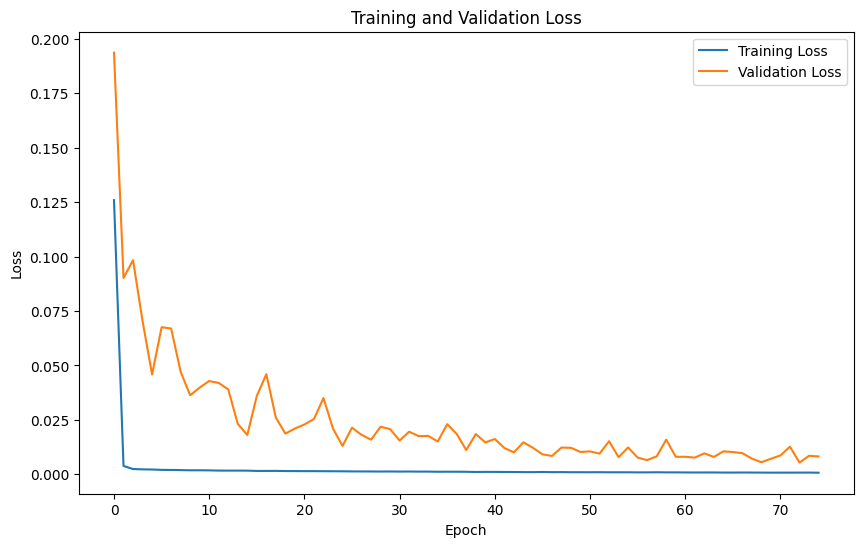

In [22]:
# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


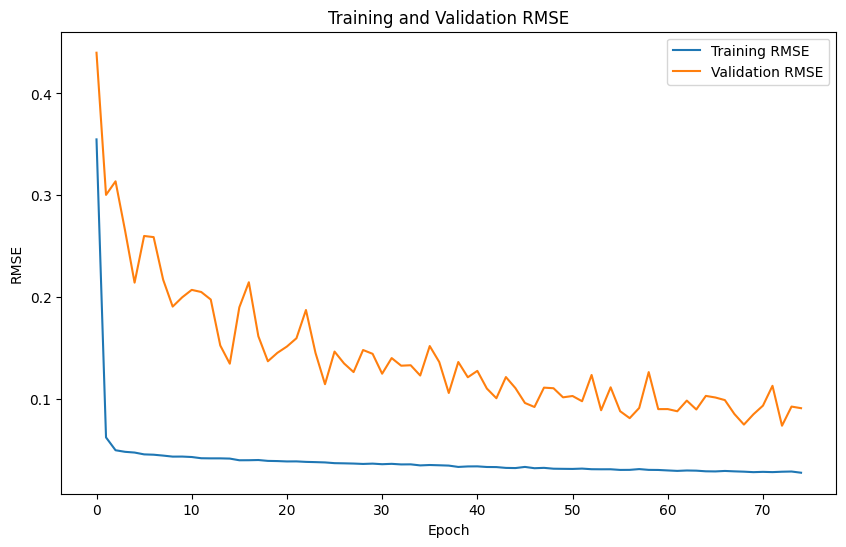

In [23]:
# Plot training & validation RMSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


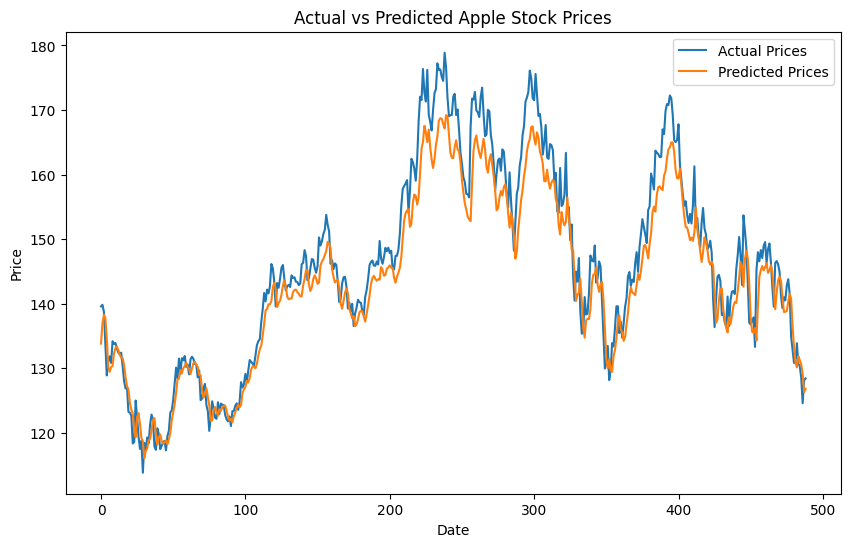

In [24]:
# Plot Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(test_predict_actual, label='Predicted Prices')
plt.title('Actual vs Predicted Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [25]:
# Download Apple stock data for 2022
data_2022 = yf.download('AAPL', start='2022-01-01', end='2022-12-31')


[*********************100%***********************]  1 of 1 completed


In [26]:
# Normalize 2022 data using the same scaler
scaled_data_2022 = scaler.transform(data_2022[['Close']].values)

# Create dataset with sequences for LSTM for 2022
X_2022, y_2022 = create_dataset(scaled_data_2022, time_step)

# Reshape data for LSTM input
X_2022 = X_2022.reshape(X_2022.shape[0], X_2022.shape[1], 1)


In [27]:
# Predict stock prices for 2022
test_predict_2022 = model.predict(X_2022)

# Inverse transform the predictions to actual stock price values
test_predict_actual_2022 = scaler.inverse_transform(test_predict_2022)
y_test_actual_2022 = scaler.inverse_transform(y_2022.reshape(-1, 1))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [28]:
# Calculate RMSE for 2022
test_rmse_2022 = np.sqrt(mean_squared_error(y_test_actual_2022, test_predict_actual_2022))
print(f'Test RMSE for 2022: {test_rmse_2022}')


Test RMSE for 2022: 4.5590572060799985


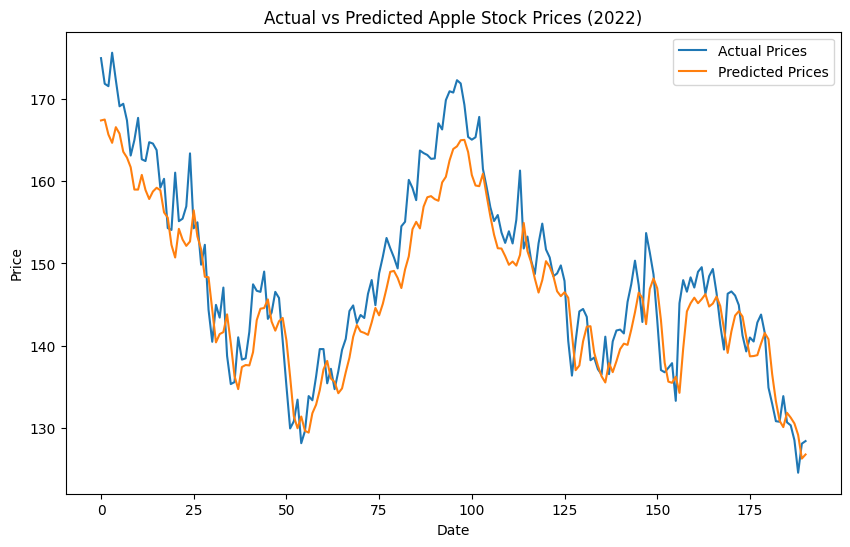

In [29]:
# Plot Actual vs Predicted Prices for 2022
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual_2022, label='Actual Prices')
plt.plot(test_predict_actual_2022, label='Predicted Prices')
plt.title('Actual vs Predicted Apple Stock Prices (2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Summary:
In this project, I built a Long Short-Term Memory (LSTM) model to predict Apple's stock price for the year 2021. The model was trained using historical stock data from January 1, 2021, to December 31, 2021. The goal was to predict the next day's stock price based on the previous 60 days of data.

# Key Findings:
Model Performance:

The Training RMSE was 1.29, which indicates that the model fit the training data well.
The Test RMSE for 2021 was 4.44, suggesting that the model struggles to generalize to unseen data, a common challenge in stock price prediction.

## Loss and RMSE Visualization:

The Training Loss consistently decreased, but the Validation Loss showed fluctuations, which suggests potential overfitting. The Training RMSE decreased steadily, while the Validation RMSE exhibited some oscillations, indicating room for improvement in generalization.
Prediction Accuracy:

The Actual vs. Predicted Prices graph demonstrated that the model captured the overall trend of Apple's stock price but had some deviations, especially during more volatile periods. This is typical in stock price forecasting due to market unpredictability.

## Testing on 2022 Data:

After training the model on 2021 data, I tested it on 2022 data. The Test RMSE for 2022 was 4.56, indicating that the model had similar performance on data from 2022. This shows that the model can follow trends in stock prices, but it still struggles with exact predictions, especially in more volatile periods.